# getting the data

Today, we will work with the UN General Debate dataset. The corpus consists of 7,507 speeches held at the annual sessions of the United Nations General Assembly from 1970 to 2016. It was created in 2017 by Mikhaylov, Baturo, and Dasandi at Harvard “for understanding and measuring state preferences in world politics.” Each of the almost 200 countries in the United Nations has the opportunity to present its views on global topics such international conflicts, terrorism, or climate change at the annual General Debate.
Work on this data is proposed in the book 

- https://github.com/blueprints-for-text-analytics-python/blueprints-text
- from here, but rather it's easier to use the version on my server. 
  - https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/data/un-general-debates/un-general-debates-blueprint.csv.gz



## downloading some toy data

only once!
may not work on windoze.

In [1]:
# check if the file un-general-debates-blueprint.csv is present
# if not, download it from the web and unzip it

import os
if os.path.exists('un-general-debates-blueprint.csv'):
    print('File already present')
else:
    print('Downloading the file...')
    os.system('wget https://gerdes.fr/saclay/informationRetrieval/un-general-debates-blueprint.csv.gz')
    os.system('gunzip un-general-debates-blueprint.csv.gz')


File already present


In [2]:
# this turns on the autotimer, so that every cell has a timing information below
try:
    %load_ext autotime
except:
    !pip install ipython-autotime
    %load_ext autotime
# in order to stop using the autotimer:
# %unload_ext autotime

time: 0 ns (started: 2024-03-14 20:04:03 +01:00)


In [3]:
!pip install nltk wordcloud seaborn

time: 4.84 s (started: 2024-03-14 20:04:03 +01:00)


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm
from wordcloud import WordCloud
import re

C:\Users\pmoll\AppData\Local\Temp\ipykernel_1468\629354151.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


time: 7.3 s (started: 2024-03-14 20:04:08 +01:00)


In [5]:
df = pd.read_csv("un-general-debates-blueprint.csv")
df.sample(22) #, random_state=53)

,session,year,country,country_name,speaker,position,text
4216,53,1998,NAM,Namibia,Theo-Ben Gurirab,Minister for Foreign Affairs,"Before I deliver my\nstatement, let me express..."
5813,62,2007,CRI,Costa Rica,Bruno Stagno Ugarte,Minister for Foreign Affairs,The 192 Member States gathered here have not ...
3307,48,1993,LBN,Lebanon,MR. RAFIC HARIRI,PRIME MINISTER,It gives me pleasure to start out by congratul...
6618,66,2011,IRN,"Iran, Islamic Republic of",Mahmoud Ahmadinejad,President,"I am grateful \nto the Almighty Allah, who has..."
7201,69,2014,ISL,Iceland,Gunnar Bragi Sveinsson,Minister for Foreign Affairs,Next year we will \ncelebrate the seventieth a...
4119,53,1998,BOL,"Bolivia, Plurinational State of",Murillo de la Rocha,Minister for Foreign Affairs,The election of the Foreign Minister of\nUrugu...
5853,62,2007,ISL,Iceland,Ingibjörg Sólrún Gísladóttir,Minister for Foreign Affairs,"First, allow me to \ncongratulate you, Mr. Pre..."
5250,59,2004,DNK,Denmark,Dr. Per Stig Møller,Minister for Foreign Affairs,"When we met a year\nago, there was widespread ..."
6235,64,2009,IRN,"Iran, Islamic Republic of",Mahmoud Ahmadinejad,President,I thank Almighty God \nfor granting me the opp...
692,31,1976,BDI,Burundi,Mr. Bwarkira,NaN,"As I speak in this world assembly, my first wo..."


time: 2.44 s (started: 2024-03-14 20:04:15 +01:00)


## Let's get to know the data (and Pandas):

In [6]:
df.columns, df.dtypes

(Index(['session', 'year', 'country', 'country_name', 'speaker', 'position',
        'text'],
       dtype='object'),
 session          int64
 year             int64
 country         object
 country_name    object
 speaker         object
 position        object
 text            object
 dtype: object)

time: 31 ms (started: 2024-03-14 20:04:18 +01:00)


In [7]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7507 entries, 0 to 7506
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   session       7507 non-null   int64 
 1   year          7507 non-null   int64 
 2   country       7507 non-null   object
 3   country_name  7507 non-null   object
 4   speaker       7480 non-null   object
 5   position      4502 non-null   object
 6   text          7507 non-null   object
dtypes: int64(2), object(5)
memory usage: 232.1 MB
time: 63 ms (started: 2024-03-14 20:04:18 +01:00)


## Adding the "length" column, describing the dataframe

In [8]:
df['length'] = df['text'].str.len()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
session,7507.0,49.610763,12.892155,25.0,39.0,51.0,61.0,70.0
year,7507.0,1994.610763,12.892155,1970.0,1984.0,1996.0,2006.0,2015.0
length,7507.0,17967.281604,7860.038463,2362.0,12077.0,16424.0,22479.5,72041.0


time: 31 ms (started: 2024-03-14 20:04:18 +01:00)


#### 🚧 todo: how long did the longest speech last?

length in characters: how much is one page (11pt)?  English ~ 600 words. 

That's approximately how many characters (including spaces)?

xxxx

What's your guess for 
German? French? Russian? Thai? Japanese?

In English, how many words per minute? ~ 150



In [9]:
# how many words for the longest speech?
print("Considering the average word length of 6, the total number of words is:", 72000/6, "\n")

# how many pages for the longest speech?
print("Considering around 600 words per page and an average length for a word of 6, the number of pages for the longest speech would be:", (72000/6)/600, "\n")

# how long to read one page?
print("Considering a minute per 150 words and an average page is composed of 600 words, it would take around", 600/150, "minutes.\n")

# how long to read the longest speech?
print("The longest speech has around 72k characters, meaning that it has around 12k words, which corresponds to 20 pages. It would take around", 4 * 20,'minutes to read it.')


Considering the average word length of 6, the total number of words is: 12000.0 

Considering around 600 words per page and an average length for a word of 6, the number of pages for the longest speech would be: 20.0 

Considering a minute per 150 words and an average page is composed of 600 words, it would take around 4.0 minutes.

The longest speech has around 72k characters, meaning that it has around 12k words, which corresponds to 20 pages. It would take around 80 minutes to read it.
time: 0 ns (started: 2024-03-14 20:04:18 +01:00)


## mean < average -> ?

terms you probably know: mode ? mean ? average ?

In [10]:
df[['country', 'speaker']].describe().T

,count,unique,top,freq
country,7507,199,ALB,46
speaker,7480,5428,Seyoum Mesfin,12


time: 31 ms (started: 2024-03-14 20:04:18 +01:00)


## NaN ≠ NA
NaN means 0/0. NaN stands for Not a Number

NA is generally interpreted as a missing value and has various forms - NA_integer_, NA_real_, etc.

https://stats.stackexchange.com/questions/5686/what-is-the-difference-between-nan-and-na

In [11]:
df.isna().sum()

session            0
year               0
country            0
country_name       0
speaker           27
position        3005
text               0
length             0
dtype: int64

time: 15 ms (started: 2024-03-14 20:04:18 +01:00)


In [12]:
df[df['position'].isna()]

,session,year,country,country_name,speaker,position,text,length
0,25,1970,ALB,Albania,Mr. NAS,NaN,33: May I first convey to our President the co...,51419
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,NaN,177.\t : It is a fortunate coincidence that pr...,29286
2,25,1970,AUS,Australia,Mr. McMAHON,NaN,100.\t It is a pleasure for me to extend to y...,31839
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,NaN,155.\t May I begin by expressing to Ambassado...,26616
4,25,1970,BEL,Belgium,Mr. HARMEL,NaN,"176. No doubt each of us, before coming up to ...",25911
...,...,...,...,...,...,...,...,...
4797,56,2001,SWZ,Eswatini,NaN,NaN,﻿It is an honour and\nprivilege for me to deli...,14469
6594,66,2011,EU,European Union,NaN,NaN,Europe presents to you a message of \ncooperat...,11804
6982,68,2013,EU,European Union,NaN,NaN,A year ago \nwhen we met in the General Assemb...,11477
7175,69,2014,EU,European Union,NaN,NaN,The world today is much more dangerous than \n...,10617


time: 16 ms (started: 2024-03-14 20:04:18 +01:00)


In [13]:
df['speaker'].fillna('unkown', inplace=True)
df['position'].fillna('unkown', inplace=True)
df[df['position'].isna()]

C:\Users\pmoll\AppData\Local\Temp\ipykernel_1468\1926195262.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['speaker'].fillna('unkown', inplace=True)
C:\Users\pmoll\AppData\Local\Temp\ipykernel_1468\1926195262.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

,session,year,country,country_name,speaker,position,text,length


time: 16 ms (started: 2024-03-14 20:04:18 +01:00)


# categorical values vs numerical values

In [14]:
df[df['speaker'].str.contains('Bush')]['speaker'].value_counts()

speaker
George W. Bush        4
Mr. George W. Bush    2
Bush                  1
George Bush           1
Mr. George W Bush     1
Name: count, dtype: int64

time: 16 ms (started: 2024-03-14 20:04:18 +01:00)


<Axes: >

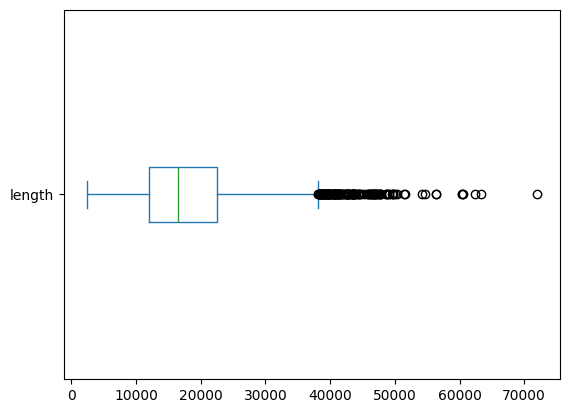

time: 344 ms (started: 2024-03-14 20:04:18 +01:00)


In [15]:
df['length'].plot(kind='box', vert=False)


<Axes: ylabel='Frequency'>

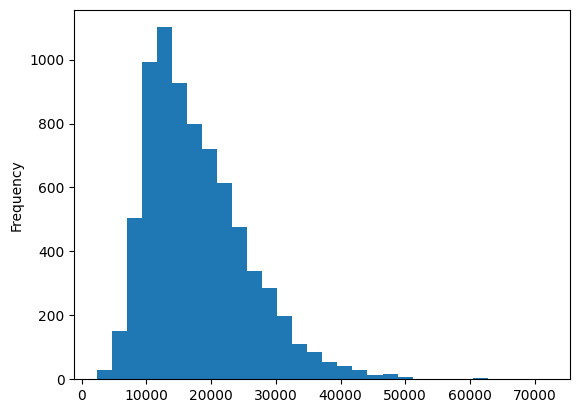

time: 485 ms (started: 2024-03-14 20:04:19 +01:00)


In [16]:
df['length'].plot(kind='hist', bins=30) # , figsize=(8,2)

### Kernel density estimation

https://en.wikipedia.org/wiki/Kernel_density_estimation

if error: "FutureWarning: `distplot` is a deprecated function"

update scipy: `pip3 install --upgrade scipy `

if it persists
    

In [17]:
# only if you got warnings!!!
import warnings
warnings.filterwarnings("ignore")

time: 0 ns (started: 2024-03-14 20:04:19 +01:00)


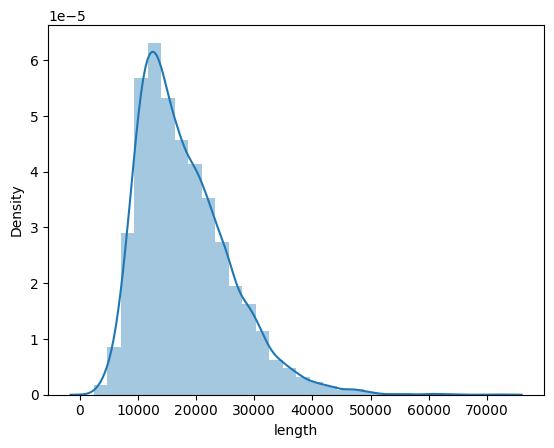

time: 531 ms (started: 2024-03-14 20:04:19 +01:00)


In [18]:
#plt.figure(figsize=(8, 2))
sns.distplot(df['length'], bins=30, kde=True);

# Seaborn docs?
https://seaborn.pydata.org/index.html  
https://seaborn.pydata.org/generated/seaborn.distplot.html

## from where?

catplot shows the relationship between a numerical and one or more categorical variables.
https://seaborn.pydata.org/generated/seaborn.catplot.html

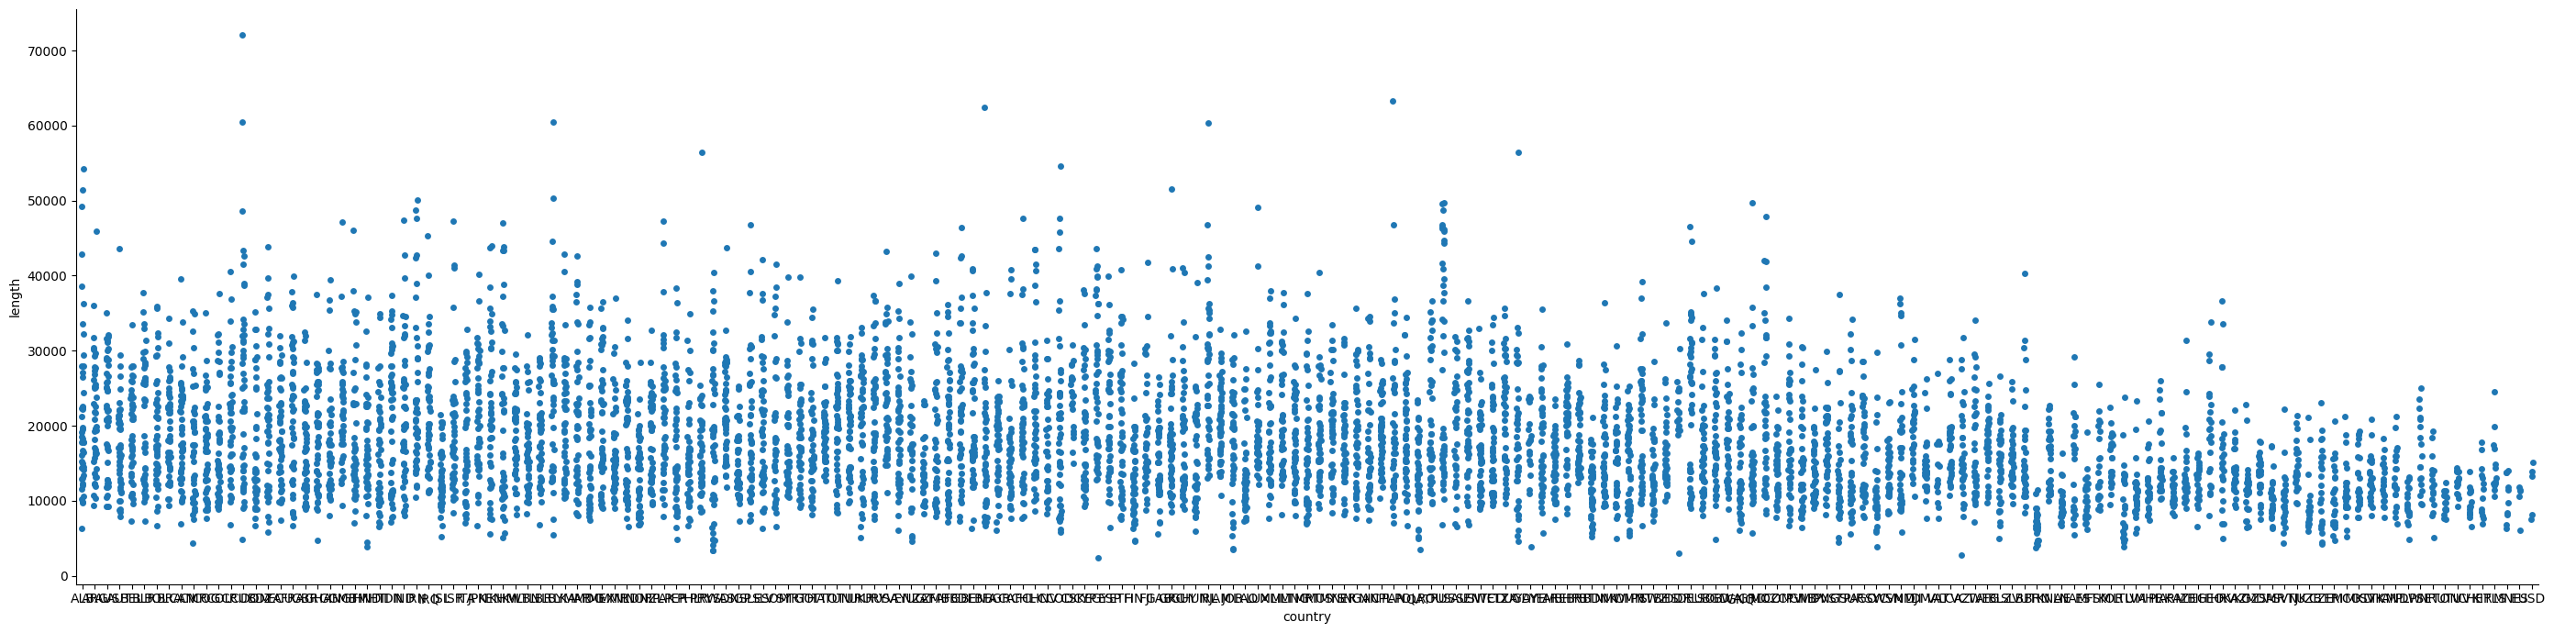

time: 7.42 s (started: 2024-03-14 20:04:20 +01:00)


In [19]:
sns.catplot(data=df, x="country", y="length", height=7, aspect=4) 

In [20]:
# how to build a selection:
df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])

0       False
1       False
2       False
3       False
4       False
        ...  
7502    False
7503    False
7504    False
7505    False
7506    False
Name: country, Length: 7507, dtype: bool

time: 0 ns (started: 2024-03-14 20:04:27 +01:00)


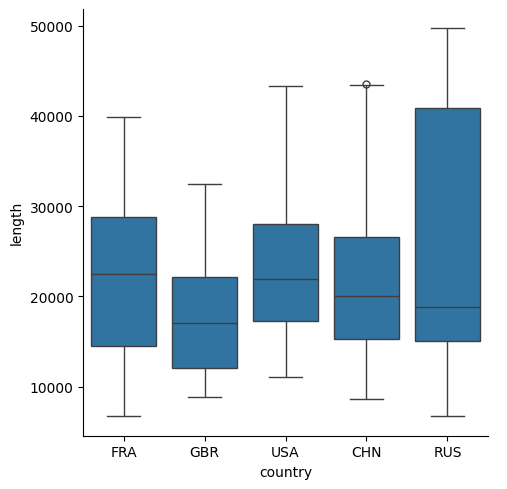

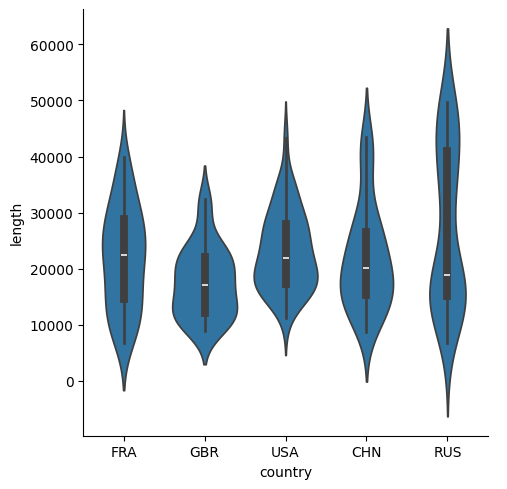

time: 860 ms (started: 2024-03-14 20:04:27 +01:00)


In [21]:
# using the selection
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS'])
sns.catplot(data=df[where], x="country", y="length", kind='box')
sns.catplot(data=df[where], x="country", y="length", kind='violin')

## significant differences?

Student test? Anova ?

if the boxes (marking the quartiles) don't overlap each other and the sample size is at least 10, then the two groups being compared should have different medians at the 5% level: https://stats.stackexchange.com/questions/262495/reading-box-and-whisker-plots-possible-to-glean-significant-differences-between

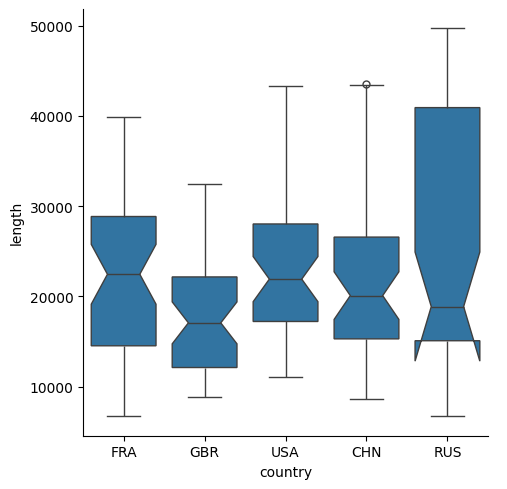

time: 406 ms (started: 2024-03-14 20:04:28 +01:00)


In [22]:
sns.catplot(data=df[where], x="country", y="length", kind='box', notch= True)

## time?

size() returns the number of rows per group  
Why number of countries?

<Axes: title={'center': 'Number of Countries'}, xlabel='year'>

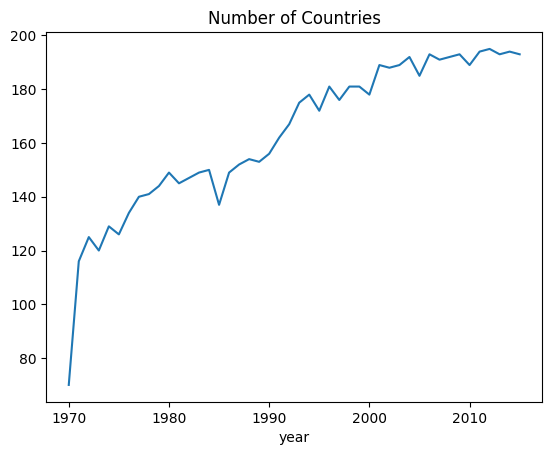

time: 328 ms (started: 2024-03-14 20:04:29 +01:00)


In [23]:
df.groupby('year').size().plot(title="Number of Countries")

when more people want to speak, ...?

<Axes: title={'center': 'Avg. Speech Length'}, xlabel='year'>

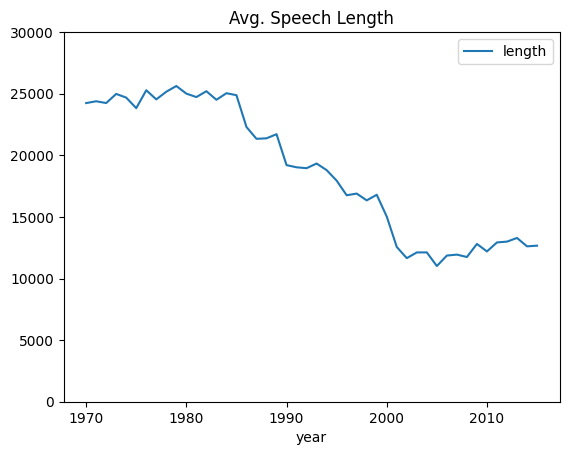

time: 328 ms (started: 2024-03-14 20:04:29 +01:00)


In [24]:
df.groupby('year').agg({'length': 'mean'}).plot(title="Avg. Speech Length", ylim=(0,30000))

# Tokenization

Describe in one sentence the difference between the tokenizations. Which one is your favorite and why?


In [25]:
# 1.
text = "Let's all together defeat last year's problem, SARS-CoV-2, in 2022!"
'|'.join(text.split()),len(text.split())

("Let's|all|together|defeat|last|year's|problem,|SARS-CoV-2,|in|2022!", 10)

time: 16 ms (started: 2024-03-14 20:04:29 +01:00)


In [26]:
# 2.
nochar = re.compile('\W+')
'|'.join(nochar.split(text)),len(nochar.split(text))

('Let|s|all|together|defeat|last|year|s|problem|SARS|CoV|2|in|2022|', 15)

time: 15 ms (started: 2024-03-14 20:04:29 +01:00)


In [27]:
# 3.
nochar = re.compile('(\W+)')
'|'.join(nochar.split(text)),len(nochar.split(text))

("Let|'|s| |all| |together| |defeat| |last| |year|'|s| |problem|, |SARS|-|CoV|-|2|, |in| |2022|!|",
 29)

time: 16 ms (started: 2024-03-14 20:04:29 +01:00)


In [28]:
#4.
charorhyphen = re.compile(r'[\w-]+')
'|'.join(charorhyphen.findall(text)),len(charorhyphen.findall(text))

('Let|s|all|together|defeat|last|year|s|problem|SARS-CoV-2|in|2022', 12)

time: 16 ms (started: 2024-03-14 20:04:29 +01:00)


### using a specialized class: nltk

In [29]:
#5.
'|'.join(word_tokenize(text)),len(word_tokenize(text))

("Let|'s|all|together|defeat|last|year|'s|problem|,|SARS-CoV-2|,|in|2022|!",
 15)

time: 32 ms (started: 2024-03-14 20:04:30 +01:00)


We will consider the advantages and drawbacks for each case and finally choose the best one according to our opinion.

1. **Split on whitespace**:
   - **Advantages**: Simple and fast, no external libraries needed.
   - **Drawbacks**: Only splits on spaces, so punctuation is not removed and remains attached to the words.

2. **Split using regex to exclude non-word characters**:
   - **Advantages**: Strips out punctuation effectively, leaving only words.
   - **Drawbacks**: Can incorrectly split words with apostrophes (e.g., "Let's" becomes "Let" and "s") or hyphenated words. Which doesn't add much information.

3. **Split using regex to keep word characters and apostrophes**:
   - **Advantages**: Keeps apostrophes as part of words, which can be important for contractions or possessives in English.
   - **Drawbacks**: Could still incorrectly split certain special terms or names, and may keep hyphens as part of words when they should be removed.

4. **Split using regex for char or hyphen**
   - **Advantages**: This method preserves hyphenated words as single tokens, which is beneficial for certain types of analysis where the meaning of a hyphenated word is distinct from its parts.
   - **Drawbacks**: This method might be too simplistic for some datasets as it does not account for punctuation (except hyphens) or special characters that might be important for the text's meaning. It might not align with standard word tokenization in cases where punctuation plays a role in the tokenization (e.g., "U.S.A." would be split into "U", "S", "A").

5. **Tokenization using NLTK**:
   - **Advantages**: A sophisticated approach that uses natural language processing to handle a variety of tokenization cases, including punctuation and contractions.
   - **Drawbacks**: Slower than simple split methods and requires an external library.

For a more sophisticated tokenization that handles a variety of cases more accurately, I believe that **method #5** using NLTK is the best.


Note that these are idiosyncratic rules for English. Think of *viens-tu*, *où va-t-il*, *Kaffeetasse*, *cantolo*, *我爱你*, ...

and it's slow!

In [30]:
for t in tqdm(df['text'][:100]):
    toks = word_tokenize(t)

  0%|          | 0/100 [00:00<?, ?it/s]

time: 3.53 s (started: 2024-03-14 20:04:30 +01:00)


### so be patient for this line:

In [31]:
df['tokens'] = df['text'].map(word_tokenize)
df['num_tokens'] = df['tokens'].map(len)

time: 2min 29s (started: 2024-03-14 20:04:33 +01:00)


In [32]:
display(df)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens
0,25,1970,ALB,Albania,Mr. NAS,unkown,33: May I first convey to our President the co...,51419,"[33, :, May, I, first, convey, to, our, Presid...",9072
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,unkown,177.\t : It is a fortunate coincidence that pr...,29286,"[177., :, It, is, a, fortunate, coincidence, t...",5184
2,25,1970,AUS,Australia,Mr. McMAHON,unkown,100.\t It is a pleasure for me to extend to y...,31839,"[100, ., It, is, a, pleasure, for, me, to, ext...",5695
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,unkown,155.\t May I begin by expressing to Ambassado...,26616,"[155, ., May, I, begin, by, expressing, to, Am...",4708
4,25,1970,BEL,Belgium,Mr. HARMEL,unkown,"176. No doubt each of us, before coming up to ...",25911,"[176, ., No, doubt, each, of, us, ,, before, c...",4789
...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[On, behalf, of, the, people, and, the, Govern...",1898
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[Seventy, years, have, passed, since, the, est...",4583
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[I, should, like, to, congratulate, the, Presi...",2388
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[I, would, like, to, begin, by, thanking, the,...",2445


time: 31 ms (started: 2024-03-14 20:07:03 +01:00)


In [33]:
df['num_tokens'] = df['tokens'].map(len)

time: 0 ns (started: 2024-03-14 20:07:03 +01:00)


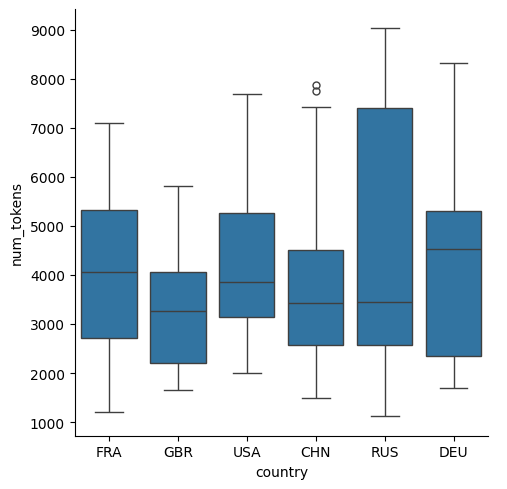

time: 1.06 s (started: 2024-03-14 20:07:03 +01:00)


In [34]:
where = df['country'].isin(['USA', 'FRA', 'GBR', 'CHN', 'RUS', 'FRG', 'DEU'])
sns.catplot(data=df[where], x="country", y="num_tokens", kind='box')

## 🚧 todo: When speaking English, do Germans use longer words?

- Compare to English natives and French speakers using notched box plots.
- Is the result significant?
- How do you explain this?

### French & English

In [35]:
# 🚧 todo:

df['avg_wordsize'] = round(df["length"] / df["num_tokens"])
display(df)

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,avg_wordsize
0,25,1970,ALB,Albania,Mr. NAS,unkown,33: May I first convey to our President the co...,51419,"[33, :, May, I, first, convey, to, our, Presid...",9072,6.0
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,unkown,177.\t : It is a fortunate coincidence that pr...,29286,"[177., :, It, is, a, fortunate, coincidence, t...",5184,6.0
2,25,1970,AUS,Australia,Mr. McMAHON,unkown,100.\t It is a pleasure for me to extend to y...,31839,"[100, ., It, is, a, pleasure, for, me, to, ext...",5695,6.0
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,unkown,155.\t May I begin by expressing to Ambassado...,26616,"[155, ., May, I, begin, by, expressing, to, Am...",4708,6.0
4,25,1970,BEL,Belgium,Mr. HARMEL,unkown,"176. No doubt each of us, before coming up to ...",25911,"[176, ., No, doubt, each, of, us, ,, before, c...",4789,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[On, behalf, of, the, people, and, the, Govern...",1898,6.0
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[Seventy, years, have, passed, since, the, est...",4583,6.0
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[I, should, like, to, congratulate, the, Presi...",2388,6.0
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[I, would, like, to, begin, by, thanking, the,...",2445,6.0


time: 46 ms (started: 2024-03-14 20:07:04 +01:00)


<Axes: xlabel='country', ylabel='avg_wordsize'>

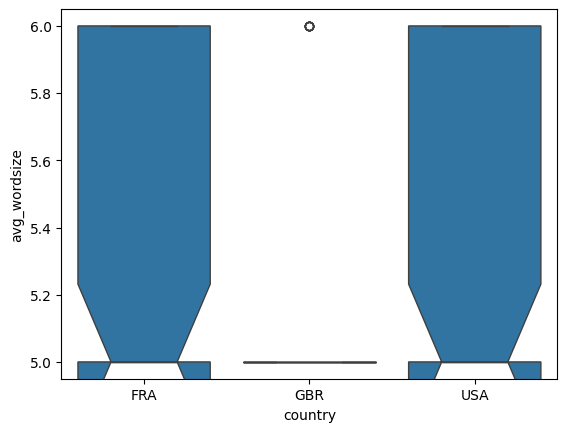

time: 297 ms (started: 2024-03-14 20:07:04 +01:00)


In [36]:
# 🚧 todo:

where = df['country'].isin(['USA', 'FRA', 'GBR'])
sns.boxplot(data=df[where], x='country', y='avg_wordsize', notch=True)

- The height of the box represents the interquartile range (IQR), which is the range between the first quartile (25th percentile) and the third quartile (75th percentile). The median is marked by a line across the box, and the notches represent a confidence interval around the median.

- For the GBR box, the very small IQR suggests that most of the data points (average word sizes) are very close to the median, indicating low variability in the word sizes for this country. The fact that the median notch is also very narrow means there's high confidence in the median estimate, likely due to the data points being so consistently close to one another.

- The presence of an outlier (the dot above the GBR box) indicates that there is at least one value of average word size that is significantly different from the rest of the data points for GBR. As the dataset contains mostly 5s (average length for word size in Great Britain) with a few instances of 6 for GBR, it's likely that the median is around 5, with the IQR being very small because there is little variation from that median except for the few 6s which appear as outliers.

- In essence, the small size of the GBR box on the plot indicates that there's little variability in the average word size for GBR in the dataset, and this is also why the notch is quite narrow—reflecting a higher confidence in the median estimate despite the small sample size.

### Germans & English

<Axes: xlabel='country', ylabel='avg_wordsize'>

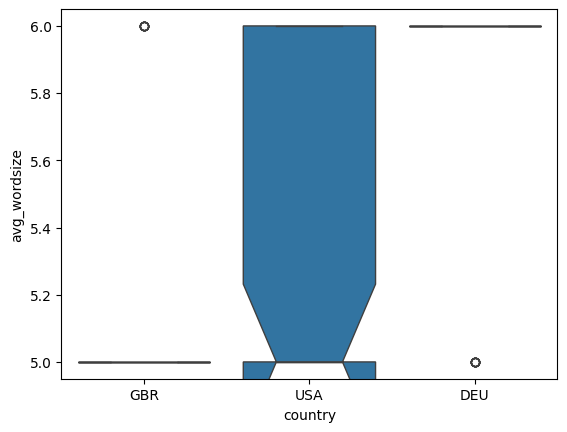

time: 282 ms (started: 2024-03-14 20:07:05 +01:00)


In [37]:
where = df['country'].isin(['USA', 'DEU', 'GBR'])
sns.boxplot(data=df[where], x='country', y='avg_wordsize', notch=True)

- The German box is shorter than the USA's but taller than GBR's, indicating variability that is between the two. The notches are relatively narrow, showing a fair amount of confidence in the median's estimate. There is one outlier, similar to GBR, showing a document with an unusually large average word size.

- The fact that the DEU box's median line is at the higher end of the scale suggests that German speeches or documents have a higher average word size, which aligns with what we might expect given the German language's propensity for compound words, which tend to be longer. The single outlier also suggests that there's at least one instance of an exceptionally short word size in the German data.

# Let's Zipf it!
## skim through this section if you have followed Hands-on NLP!
but execute the code so that we have the freq_df and start again at word clouds
### Let's first flatten the list

In [38]:
alltoks = [item for sublist in df['tokens'] for item in sublist] 
len(alltoks)

23572348

time: 1.72 s (started: 2024-03-14 20:07:05 +01:00)


In [39]:
text = "Let's all together defeat last year's problem, SARS-CoV-2, in 2021!"
tokens = word_tokenize(text)
counter = Counter(tokens)
counter

Counter({"'s": 2,
         ',': 2,
         'Let': 1,
         'all': 1,
         'together': 1,
         'defeat': 1,
         'last': 1,
         'year': 1,
         'problem': 1,
         'SARS-CoV-2': 1,
         'in': 1,
         '2021': 1,
         '!': 1})

time: 0 ns (started: 2024-03-14 20:07:07 +01:00)


### What are the most common words of English?

In [40]:
counter = Counter(alltoks)
counter.most_common(22)

[('the', 1764100),
 ('of', 1155666),
 (',', 971307),
 ('.', 863507),
 ('and', 791128),
 ('to', 727448),
 ('in', 470083),
 ('a', 328966),
 ('that', 299331),
 ('is', 240515),
 ('for', 220917),
 ('on', 156744),
 ('be', 138170),
 ('The', 133213),
 ('our', 129779),
 ('by', 125374),
 ('we', 125202),
 ('with', 122804),
 ('are', 121516),
 ('as', 120828),
 ('United', 118277),
 ('which', 118122)]

time: 3.92 s (started: 2024-03-14 20:07:07 +01:00)


for even bigger databases, it might be advisable to do the computation iteratively:

In [41]:
counter = Counter()
df['tokens'].map(counter.update)
counter.most_common(22)

[('the', 1764100),
 ('of', 1155666),
 (',', 971307),
 ('.', 863507),
 ('and', 791128),
 ('to', 727448),
 ('in', 470083),
 ('a', 328966),
 ('that', 299331),
 ('is', 240515),
 ('for', 220917),
 ('on', 156744),
 ('be', 138170),
 ('The', 133213),
 ('our', 129779),
 ('by', 125374),
 ('we', 125202),
 ('with', 122804),
 ('are', 121516),
 ('as', 120828),
 ('United', 118277),
 ('which', 118122)]

time: 3.7 s (started: 2024-03-14 20:07:11 +01:00)


In [42]:
freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
freq_df.sort_values('freq',  inplace=True, ascending=False)
freq_df

,freq
the,1764100
of,1155666
",",971307
.,863507
and,791128
...,...
solution-for,1
Chad-landlocked,1
South-a,1
36/210,1


time: 94 ms (started: 2024-03-14 20:07:15 +01:00)


<Axes: >

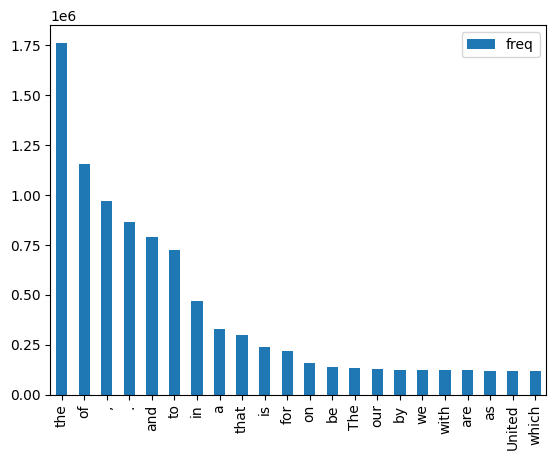

time: 1 s (started: 2024-03-14 20:07:15 +01:00)


In [43]:
freq_df.head(22).plot(kind='bar')


<Axes: >

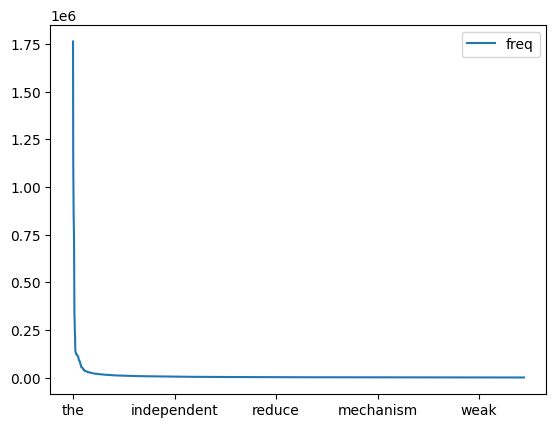

time: 265 ms (started: 2024-03-14 20:07:16 +01:00)


In [44]:
freq_df.head(2222).plot()

<Axes: >

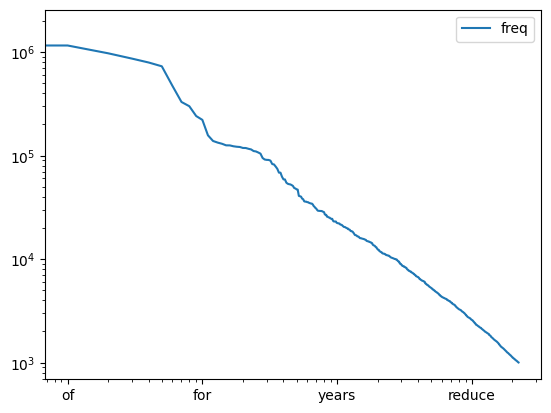

time: 922 ms (started: 2024-03-14 20:07:17 +01:00)


In [45]:
freq_df.head(2222).plot(loglog=True)

futher reading:  
https://en.wikipedia.org/wiki/Zipf's_law  
https://stats.stackexchange.com/questions/6780/how-to-calculate-zipfs-law-coefficient-from-a-set-of-top-frequencies

# Word cloud

http://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud

(-0.5, 399.5, 199.5, -0.5)

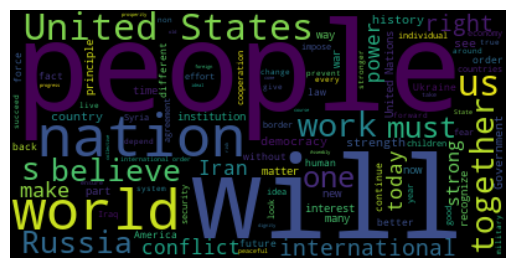

time: 391 ms (started: 2024-03-14 20:07:18 +01:00)


In [46]:
text = df.query("year==2015 and country=='USA'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

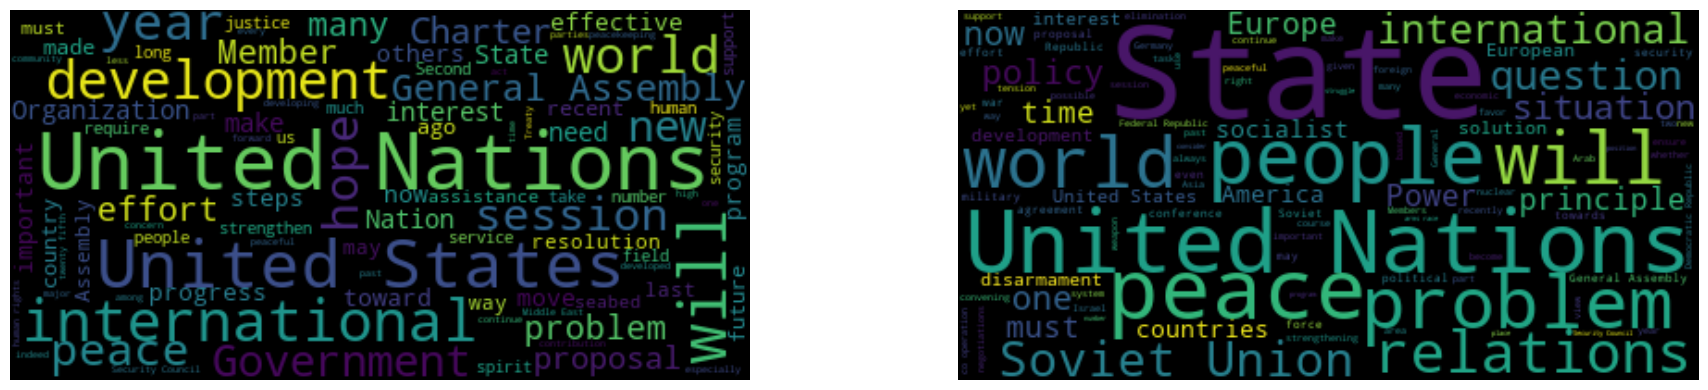

time: 844 ms (started: 2024-03-14 20:07:18 +01:00)


In [47]:
plt.subplots(1, 2, figsize=(20, 4))

text = df.query("country=='USA'")['text'].values[0]
#print(text)
wc = WordCloud(max_words=100)
wc.generate(text)
plt.subplot(1, 2, 1)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

text = df.query("country=='RUS'")['text'].values[0]
wc = WordCloud(max_words=100)
wc.generate(text)

plt.subplot(1, 2, 2)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

plt.tight_layout()

(-0.5, 399.5, 199.5, -0.5)

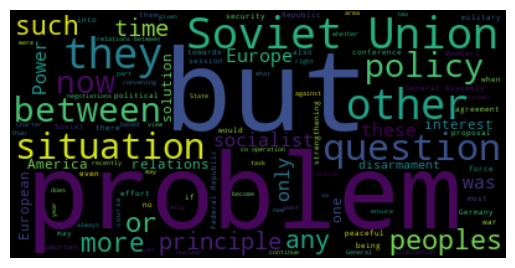

time: 422 ms (started: 2024-03-14 20:07:19 +01:00)


In [48]:
wc = WordCloud(max_words=100, stopwords=freq_df.head(50).index)
wc.generate(text)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

the `generate_from_frequencies` function allows to generate without stopwords directly from a Counter:

(-0.5, 399.5, 199.5, -0.5)

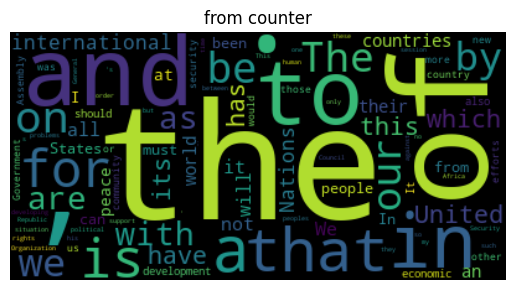

time: 469 ms (started: 2024-03-14 20:07:20 +01:00)


In [49]:
wc.generate_from_frequencies(counter)
plt.title('from counter')
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

# Index

We want to build an inverted index:
- make a df such that for every type, we have a 1 if the document contains the type, 0 if not.
- for every type, give a list of document ids

# 🚧 todo:
- how many types do we have?
- how many documents do we have?

In [50]:
df

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,avg_wordsize
0,25,1970,ALB,Albania,Mr. NAS,unkown,33: May I first convey to our President the co...,51419,"[33, :, May, I, first, convey, to, our, Presid...",9072,6.0
1,25,1970,ARG,Argentina,Mr. DE PABLO PARDO,unkown,177.\t : It is a fortunate coincidence that pr...,29286,"[177., :, It, is, a, fortunate, coincidence, t...",5184,6.0
2,25,1970,AUS,Australia,Mr. McMAHON,unkown,100.\t It is a pleasure for me to extend to y...,31839,"[100, ., It, is, a, pleasure, for, me, to, ext...",5695,6.0
3,25,1970,AUT,Austria,Mr. KIRCHSCHLAEGER,unkown,155.\t May I begin by expressing to Ambassado...,26616,"[155, ., May, I, begin, by, expressing, to, Am...",4708,6.0
4,25,1970,BEL,Belgium,Mr. HARMEL,unkown,"176. No doubt each of us, before coming up to ...",25911,"[176, ., No, doubt, each, of, us, ,, before, c...",4789,5.0
...,...,...,...,...,...,...,...,...,...,...,...
7502,70,2015,YEM,Yemen,Mr. Abdrabuh Mansour Hadi Mansour,President,On behalf of the people and the Government of ...,10568,"[On, behalf, of, the, people, and, the, Govern...",1898,6.0
7503,70,2015,YUG,Yugoslavia,Mr. Tomislav Nikolić,President,\nSeventy years have passed since the establis...,25430,"[Seventy, years, have, passed, since, the, est...",4583,6.0
7504,70,2015,ZAF,South Africa,Jacob Zuma,President,I should like to congratulate the President an...,13662,"[I, should, like, to, congratulate, the, Presi...",2388,6.0
7505,70,2015,ZMB,Zambia,Mr. Edgar Chagwa Lungu,President,I would like to begin by thanking the Secretar...,14247,"[I, would, like, to, begin, by, thanking, the,...",2445,6.0


time: 31 ms (started: 2024-03-14 20:07:20 +01:00)


In [51]:
# Initialize a dictionary to keep track of types and the documents they appear in
binary_dict = {}

# Step 1: Create the Binary DataFrame
# Iterate through each document
for index, row in df.iterrows():
    tokens = row["tokens"]
    # Update the dictionary for each token
    for token in tokens:
        if token not in binary_dict:
            binary_dict[token] = [0] * len(df)  # Initialize with zeros
        binary_dict[token][index] = 1  # Set to 1 for this document


# Convert the dictionary to a DataFrame
binary_df = pd.DataFrame(binary_dict)
binary_df

,33,:,May,I,first,convey,to,our,President,the,...,A/31/PV.41,membership-driven,Cuban-United,Farmer,officiate,States-supported,15-to-21-year-old,child-,pan-Africa,e-network
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7502,0,0,0,1,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7503,0,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
7504,0,1,0,1,1,1,1,1,1,1,...,1,1,1,0,0,0,0,0,0,0
7505,0,0,0,1,1,0,1,1,1,1,...,0,0,0,1,1,1,1,1,0,0


time: 8min 9s (started: 2024-03-14 20:07:20 +01:00)


In [52]:
#print(binary_dict["33"])

# Step 2: Create the list of document IDs for each type
inverted_index = {}
for token in binary_dict:
    inverted_index[token] = [i for i, presence in enumerate(binary_dict[token]) if presence == 1]

time: 2min 6s (started: 2024-03-14 20:15:31 +01:00)


In [53]:
print("The list of document IDs for the token '33' is:\n\n", inverted_index["33"])

The list of document IDs for the token '33' is:

 [0, 4, 7, 9, 11, 13, 15, 21, 27, 31, 34, 35, 42, 43, 48, 53, 55, 57, 59, 65, 72, 75, 82, 95, 98, 100, 104, 108, 111, 115, 119, 123, 124, 127, 129, 130, 131, 135, 138, 143, 145, 152, 167, 169, 171, 179, 180, 181, 183, 189, 192, 195, 200, 204, 214, 215, 216, 236, 240, 241, 245, 246, 247, 248, 252, 260, 271, 279, 282, 284, 285, 286, 288, 295, 298, 307, 310, 311, 326, 331, 335, 339, 340, 349, 350, 352, 356, 359, 360, 368, 383, 386, 387, 391, 394, 406, 407, 415, 416, 417, 421, 423, 428, 435, 438, 440, 445, 446, 456, 457, 459, 461, 465, 466, 469, 487, 489, 491, 498, 499, 503, 507, 509, 522, 523, 524, 528, 532, 548, 551, 552, 553, 564, 565, 566, 568, 570, 572, 574, 580, 590, 594, 601, 610, 618, 619, 622, 623, 624, 630, 634, 638, 654, 657, 659, 660, 665, 668, 670, 678, 687, 693, 702, 704, 705, 708, 713, 715, 716, 717, 719, 725, 728, 746, 750, 753, 758, 760, 761, 765, 771, 777, 780, 796, 799, 801, 804, 806, 807, 810, 811, 812, 825, 836, 850, 854

- we are checking with a small sub-sample first

In [54]:
print("There are", len(binary_dict), "different types/tokens.")
print("There are", len(binary_df), "documents.")


There are 95960 different types/tokens.
There are 7507 documents.
time: 16 ms (started: 2024-03-14 20:17:38 +01:00)


In [55]:
list(freq_df.index[66:77])

['Organization',
 'political',
 'human',
 'Africa',
 'General',
 'support',
 'Council',
 'session',
 'rights',
 'only',
 "'s"]

time: 16 ms (started: 2024-03-14 20:17:38 +01:00)


In [56]:
df[33:36]

,session,year,country,country_name,speaker,position,text,length,tokens,num_tokens,avg_wordsize
33,25,1970,KEN,Kenya,Mr. MUNGAI,unkown,"\n36.\t Mr. President, on behalf of His Excell...",21569,"[36, ., Mr., President, ,, on, behalf, of, His...",3769,6.0
34,25,1970,KHM,Cambodia,Mr. KOUN WICK,unkown,4.\t Before I begin this speech I should like ...,27661,"[4, ., Before, I, begin, this, speech, I, shou...",4955,6.0
35,25,1970,KWT,Kuwait,Mr. ALJABER,unkown,"1.\t Mr. President, your election to the aug...",17114,"[1, ., Mr., President, ,, your, election, to, ...",3017,6.0


time: 156 ms (started: 2024-03-14 20:17:39 +01:00)


In [57]:
A = np.zeros((11, 3))
print("Matrix A:\n", A)
print("\nThe total number of bytes used by matrix A is:", A.nbytes)

Matrix A:
 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

The total number of bytes used by matrix A is: 264
time: 0 ns (started: 2024-03-14 20:17:39 +01:00)


we will first try the naïve way, to find out that this easily gets too slow:

In [58]:
for i,t in enumerate(freq_df.index[66:77]):
    for j,d in enumerate(df[33:36].tokens):
        if t in d: A[i,j] =1
A

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

time: 47 ms (started: 2024-03-14 20:17:39 +01:00)


In [59]:
A.nbytes

264

time: 15 ms (started: 2024-03-14 20:17:39 +01:00)


In [60]:
A = np.zeros((100, 7507))
for i,t in tqdm(enumerate(freq_df.index[:100])):
    for j,d in enumerate(df.tokens):
        if t in d: A[i,j] =1
# optional (skip at first): can you do that loop more efficiently?
A

0it [00:00, ?it/s]

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

time: 16 s (started: 2024-03-14 20:17:40 +01:00)


In [61]:
A.nbytes

6005600

time: 15 ms (started: 2024-03-14 20:17:56 +01:00)


### Faster & more efficient way

In [62]:
# Get the top 100 terms as a set for faster lookup
top_terms = set(freq_df.index[:100])
#print("Top Terms:\n", top_terms)

# Initialize a NumPy array of zeros with 100 rows (for the top 100 terms) and len(df) columns (for each document)
B = np.zeros((100, len(df)))

# Create a mapping from term to row index
term_to_row = {term: i for i, term in enumerate(freq_df.index[:100])}
#print("\nTerm to Row:\n", term_to_row)

# Now iterate through each document's tokens a single time
for j, tokens in enumerate(df['tokens']):
    # Use set intersection to find only the terms that are both in the top 100 and in the document's tokens
    common_terms = top_terms.intersection(tokens)
    #print("\n\n", common_terms)
    
    # Set the appropriate entries in B to 1
    for term in common_terms:
        i = term_to_row[term]
        B[i, j] = 1
B

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

time: 1.75 s (started: 2024-03-14 20:17:56 +01:00)


In [63]:
B.nbytes


6005600

time: 16 ms (started: 2024-03-14 20:17:58 +01:00)


### 🚧 todo:

What would be the size of the complete table?


To estimate the complete size of a numpy array without computing it, we can calculate the size based on the data type and the dimensions of the array.

The array in our code has dimensions (len(freq_df), len(df)), where `len(df)` is 7507 (the number of documents) and `len(freq_df)` is 95960 rows. As the data type of the numpy array is the default `float64`, each element would take up 8 bytes.

The formula to calculate the size in bytes would be:

- Size in bytes = Number of rows * Number of columns * Bytes per element

Then, replacing with our values:

- Size in bytes = 95960 rows * 7507 columns * 8 bytes/element


In [64]:
# 🚧 todo:

complete_size_bytes = len(freq_df) * len(df) * 8
print("The complete size of the numpy array would be approximately", complete_size_bytes, ", which is about 5.37 GiB (gibibytes).")


The complete size of the numpy array would be approximately 5762973760 , which is about 5.37 GiB (gibibytes).
time: 15 ms (started: 2024-03-14 20:17:58 +01:00)


### 🚧 todo:

How long will it take to fill the complete table?


With the total number of terms being 95,960 and knowing that it takes approximately 3.89 seconds to process the top 100 terms, we can extrapolate to estimate the time required to process all 95,960 terms.

Here is the calculation:

- Estimated Time = Time for 100 terms * $\frac{\text{Total Terms}}{100}$

- Estimated Time = 3.89 seconds * $\frac{95,960}{100}$

Now let's do the math:


In [65]:
# 🚧 todo:
# my computer takes xxx
estimated_time = 3.89 * (95960 / 100)
print("Based on the extrapolation, it's estimated that it would take approximately", estimated_time, "seconds.")
print("\nThe estimated time to process all 95,960 terms is precisely 1 hour, 2 minutes, and approximately 12.84 seconds.")




Based on the extrapolation, it's estimated that it would take approximately 3732.844 seconds.

The estimated time to process all 95,960 terms is precisely 1 hour, 2 minutes, and approximately 12.84 seconds.
time: 16 ms (started: 2024-03-14 20:17:58 +01:00)


### redoing the same thing with CountVectorizer

In [66]:
from sklearn.feature_extraction.text import CountVectorizer

df[33:36].text

33    \n36.\t Mr. President, on behalf of His Excell...
34    4.\t Before I begin this speech I should like ...
35    1.\t   Mr. President, your election to the aug...
Name: text, dtype: object

time: 32 ms (started: 2024-03-14 20:17:59 +01:00)


In [67]:
vectorizer = CountVectorizer(vocabulary=freq_df.index[66:77], binary=True, min_df=0.0, lowercase=False)
# understand the options: 
# https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
X = vectorizer.fit_transform(df[33:36].text)
print(vectorizer.get_feature_names_out())
print(X.toarray())


['Organization' 'political' 'human' 'Africa' 'General' 'support' 'Council'
 'session' 'rights' 'only' "'s"]
[[1 1 1 1 1 1 1 1 1 1 0]
 [1 1 1 0 1 1 1 1 0 1 0]
 [1 1 1 1 1 0 0 1 1 1 0]]
time: 31 ms (started: 2024-03-14 20:17:59 +01:00)


In [68]:
# make it pretty:
d = {c:X.toarray()[i] for i,c in enumerate(df[33:36].index)}
df_cv = pd.DataFrame.from_dict(d,  orient='index',columns=freq_df.index[66:77])
df_cv

,Organization,political,human,Africa,General,support,Council,session,rights,only,'s
33,1,1,1,1,1,1,1,1,1,1,0
34,1,1,1,0,1,1,1,1,0,1,0
35,1,1,1,1,1,0,0,1,1,1,0


time: 46 ms (started: 2024-03-14 20:17:59 +01:00)


## trying the complete set of documents with the complete vocabulary

In [69]:
vectorizer = CountVectorizer(vocabulary=freq_df.index, binary=True, min_df=0.0, lowercase=False)
X = vectorizer.fit_transform(df.text)
print(len(vectorizer.get_feature_names_out()))
print(vectorizer.get_feature_names_out()[:11])
print(X.toarray())

95960
['the' 'of' ',' '.' 'and' 'to' 'in' 'a' 'that' 'is' 'for']
[[1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 [1 1 0 ... 0 0 0]]
time: 27.4 s (started: 2024-03-14 20:17:59 +01:00)


- wow! comparably fast!

- can you get the vector of "the"? is there a speech that doesn't use it?


In [70]:
print(X[:,1])

  (0, 0)	1
  (1, 0)	1
  (2, 0)	1
  (3, 0)	1
  (4, 0)	1
  (5, 0)	1
  (6, 0)	1
  (7, 0)	1
  (8, 0)	1
  (9, 0)	1
  (10, 0)	1
  (11, 0)	1
  (12, 0)	1
  (13, 0)	1
  (14, 0)	1
  (15, 0)	1
  (16, 0)	1
  (17, 0)	1
  (18, 0)	1
  (19, 0)	1
  (20, 0)	1
  (21, 0)	1
  (22, 0)	1
  (23, 0)	1
  (24, 0)	1
  :	:
  (7482, 0)	1
  (7483, 0)	1
  (7484, 0)	1
  (7485, 0)	1
  (7486, 0)	1
  (7487, 0)	1
  (7488, 0)	1
  (7489, 0)	1
  (7490, 0)	1
  (7491, 0)	1
  (7492, 0)	1
  (7493, 0)	1
  (7494, 0)	1
  (7495, 0)	1
  (7496, 0)	1
  (7497, 0)	1
  (7498, 0)	1
  (7499, 0)	1
  (7500, 0)	1
  (7501, 0)	1
  (7502, 0)	1
  (7503, 0)	1
  (7504, 0)	1
  (7505, 0)	1
  (7506, 0)	1
time: 63 ms (started: 2024-03-14 20:18:27 +01:00)


In [71]:
print(np.all(X[:,1].toarray() == 1))

True
time: 31 ms (started: 2024-03-14 20:18:27 +01:00)


# a big vocabulary:
grab a pageview file here https://dumps.wikimedia.org/other/pageviews/2022/2022-01/

we produce a list of potential terms from it:

In [72]:
terms = []
for li in open("pageviews-20220101-000000", encoding='utf-8').read().strip().split('\n'):
    t=li.split()[1]
    if li[:2]=='en' and t[:5]!='File:':
        if t[:9]=='Category:':
            t=t[9:] # can be improved Page:, Template:, ...
        terms+=[t.replace('_',' ')]
terms = sorted(set(terms))
with open('en.pages.txt', 'w', encoding='utf-8') as f:
    f.write('\n'.join(terms))

time: 11 s (started: 2024-03-14 20:18:27 +01:00)


In [73]:
terms

[' (Person of Interest)',
 '! (The Dismemberment Plan album)',
 '! (The Song Formerly Known As)',
 '! (Trippie Redd album)',
 '! (disambiguation)',
 '!!!',
 '!!! (album)',
 '!!!Fuck You!!!',
 '!!!Fuck You!!! And Then Some',
 '!!Destroy-Oh-Boy!!',
 '!!Fuck you!!',
 '!Hero',
 '!Hero (album)',
 '!Wowow!',
 '!Xoo',
 '"900", Cahiers d\'Italie et d\'Europe',
 '"A" Is for Alibi',
 '"Angel"',
 '"Awaken, My Love!"',
 '"Babbacombe" Lee',
 '"Baby Lollipops" murder',
 '"Bassy" Bob Brockmann',
 '"Big Willie" Robinson',
 '"British scientists"',
 '"Buckskin" Frank Leslie',
 '"Christmas tree" files',
 '"Civilized" Sexual Morality and Modern Nervous Illness',
 '"Coelosaurus" antiquus',
 '"Country" Johnny Mathis',
 '"Crazy" Joe Davola',
 '"Crocodile" Dundee',
 '"Crocodylus" acer',
 '"Crocodylus" affinis',
 '"Deji" Meets Girl',
 '"Don\'t Look Now"',
 '"Dr. Death" Steve Williams',
 '"Dragons" armchair',
 '"False positives" scandal',
 '"Fatty" Arbuckle',
 '"Five stars rise in the East" arm protector',
 '"F

time: 15 ms (started: 2024-03-14 20:18:38 +01:00)


In [74]:
Counter([len(t.split()) for t in terms]).most_common()

[(2, 566626),
 (3, 296255),
 (1, 190286),
 (4, 163357),
 (5, 92223),
 (6, 50354),
 (7, 27033),
 (8, 12671),
 (9, 7557),
 (10, 3782),
 (11, 1741),
 (12, 774),
 (13, 459),
 (14, 235),
 (15, 119),
 (16, 64),
 (17, 33),
 (19, 17),
 (18, 15),
 (23, 15),
 (20, 10),
 (22, 3),
 (21, 3),
 (25, 2),
 (30, 2),
 (24, 2),
 (27, 1),
 (40, 1)]

time: 625 ms (started: 2024-03-14 20:18:39 +01:00)


In [75]:
[t for t in terms if len(t.split())>33]

['Cneoridium dumosum (Nuttall) Hooker F. Collected March 26, 1960, at an Elevation of about 1450 Meters on Cerro Quemazón, 15 Miles South of Bahía de Los Angeles, Baja California, México, Apparently for a Southeastward Range Extension of Some 140 Miles']

time: 578 ms (started: 2024-03-14 20:18:39 +01:00)


- trying to index these terms

In [76]:
vectorizer = CountVectorizer(vocabulary=terms, binary=True, min_df=0.0, lowercase=False, ngram_range=(1,4))
X = vectorizer.fit_transform(df.text)

time: 1min 17s (started: 2024-03-14 20:18:40 +01:00)


In [77]:
print(vectorizer.get_feature_names_out()[:11])


[' (Person of Interest)' '! (The Dismemberment Plan album)'
 '! (The Song Formerly Known As)' '! (Trippie Redd album)'
 '! (disambiguation)' '!!!' '!!! (album)' '!!!Fuck You!!!'
 '!!!Fuck You!!! And Then Some' '!!Destroy-Oh-Boy!!' '!!Fuck you!!']
time: 578 ms (started: 2024-03-14 20:19:57 +01:00)


# Homework

complete the # 🚧 todo:

and
## find the most frequently encountered Wikipedia entity
- in number of speeches
- in number of occurrences

- which speech talks most about the "Union of African States"?




### Before submitting, check:
- I have not imported any other modules
- I have put explanations between the lines of code (either inline or in separate cells)
- My notebook runs all the way through when I hit
  1. the ↻ button and then
  2. the ⏩︎ button (remove or comment out cells that are too slow and not needed, such as installing or downloading sections).
  

I understood the questions as follows:

- In number of speeches: You need to find out which Wikipedia entity is mentioned in the highest number of different speeches. This means if an entity is mentioned more than once in the same speech, it only counts as one towards this total.

- In number of occurrences: This is about the total count of times an entity is mentioned across all speeches. If an entity is mentioned multiple times in a single speech, each mention counts separately towards this total.

- Which speech talks most about the "Union of African States"?: For this part, I determined which particular speech mentions the "Union of African States" the most number of times. 

### Question 1: In number of speeches

In [78]:
with open('en.pages.txt', 'r', encoding='utf-8') as file:
    lines = file.read().splitlines()

# Create a DataFrame from this list
entities_df = pd.DataFrame(lines, columns=['text'])

time: 735 ms (started: 2024-03-14 20:19:58 +01:00)


In [79]:
entities_df

,text
0,(Person of Interest)
1,! (The Dismemberment Plan album)
2,! (The Song Formerly Known As)
3,! (Trippie Redd album)
4,! (disambiguation)
...,...
1413635,𪔠
1413636,𪚥
1413637,𪥽
1413638,𭕄


time: 31 ms (started: 2024-03-14 20:19:59 +01:00)


In [80]:
df["tokens"]

0       [33, :, May, I, first, convey, to, our, Presid...
1       [177., :, It, is, a, fortunate, coincidence, t...
2       [100, ., It, is, a, pleasure, for, me, to, ext...
3       [155, ., May, I, begin, by, expressing, to, Am...
4       [176, ., No, doubt, each, of, us, ,, before, c...
                              ...                        
7502    [On, behalf, of, the, people, and, the, Govern...
7503    [Seventy, years, have, passed, since, the, est...
7504    [I, should, like, to, congratulate, the, Presi...
7505    [I, would, like, to, begin, by, thanking, the,...
7506    [Allow, me, at, the, outset, to, extend, to, M...
Name: tokens, Length: 7507, dtype: object

time: 31 ms (started: 2024-03-14 20:19:59 +01:00)


In [103]:
# Convert the entities to a set for faster lookup
entities_set = set(entities_df["text"])

existing_terms = [term for term in entities_set if term in freq_df.index]

terms_count_per_row = Counter()

for tokens in df['tokens']:
    terms_count_per_row.update(set(tokens))

filtered_terms_count_per_row = {term: count for term, count in terms_count_per_row.items() if term in existing_terms}

terms_count_df = pd.DataFrame.from_dict(filtered_terms_count_per_row, orient='index', columns=['count'])

sorted_terms = terms_count_df.sort_values(by='count', ascending=False)[:10]

for term, count in sorted_terms.iterrows():
    print(f"Term: {term}, is in {count['count']} rows out of {len(df.index)}")



Term: in, is in 7507 rows out of 7507
Term: of, is in 7507 rows out of 7507
Term: is, is in 7507 rows out of 7507
Term: to, is in 7507 rows out of 7507
Term: the, is in 7507 rows out of 7507
Term: on, is in 7507 rows out of 7507
Term: ,, is in 7507 rows out of 7507
Term: and, is in 7507 rows out of 7507
Term: a, is in 7507 rows out of 7507
Term: that, is in 7506 rows out of 7507
time: 4min 2s (started: 2024-03-14 23:51:50 +01:00)


### Question 2: In number of occurrences

### Question 3: Which speech talks the most about "Union of African States"?

In [101]:
df['union_african_states_count'] = df['text'].apply(lambda x: x.count("Union of African States"))
most_about_union_african_states = df.loc[df['union_african_states_count'].idxmax()]
most_about_union_african_states[['country', 'year', 'speaker', 'position', 'length', 'union_african_states_count']]

country                                GMB
year                                  1999
speaker                       Yahya Jammeh
position                         President
length                               37278
union_african_states_count               1
Name: 4341, dtype: object

time: 281 ms (started: 2024-03-14 22:52:17 +01:00)
